In [21]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D , Lambda
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
data = "./Data/Dataset"

os.listdir(data)

['covid', 'normal']

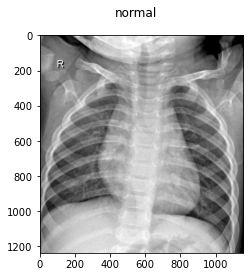

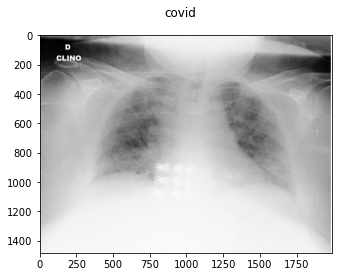

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob
%matplotlib inline

normal_images = []
for img_path in glob(data + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[0], cmap='gray') 

covid_images = []
for img_path in glob(data + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid')
plt.imshow(covid_images[0], cmap='gray') 

In [24]:
print(len(normal_images))
print(len(covid_images))

166
214


In [25]:
input_shape = (150, 150, 3)
classes  = 2
epochs = 100
batch_size = 6

In [26]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [27]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [29]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
    data,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data, 
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary',
    shuffle= False,
    subset='validation')

Found 267 images belonging to 2 classes.
Found 113 images belonging to 2 classes.


In [30]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [31]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 11,
 callbacks=[callback]
)

Epoch 1/11


C:\Users\asimj\AppData\Local\Temp/ipykernel_4388/2591232237.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


44/44 [==============================] - 11s 246ms/step - loss: 0.7322 - accuracy: 0.5441 - val_loss: 0.6825 - val_accuracy: 0.5926
Epoch 2/11
44/44 [==============================] - 11s 254ms/step - loss: 0.7456 - accuracy: 0.5900 - val_loss: 0.6359 - val_accuracy: 0.7963
Epoch 3/11
44/44 [==============================] - 11s 242ms/step - loss: 0.5782 - accuracy: 0.7625 - val_loss: 0.4524 - val_accuracy: 0.9074
Epoch 4/11
44/44 [==============================] - 11s 244ms/step - loss: 0.5297 - accuracy: 0.8123 - val_loss: 1.5749 - val_accuracy: 0.5926
Epoch 5/11
44/44 [==============================] - 11s 248ms/step - loss: 0.4368 - accuracy: 0.8621 - val_loss: 0.1359 - val_accuracy: 0.9630
Epoch 6/11
44/44 [==============================] - 11s 253ms/step - loss: 0.3379 - accuracy: 0.8659 - val_loss: 1.1392 - val_accuracy: 0.6111
Epoch 7/11
44/44 [==============================] - 11s 240ms/step - loss: 0.3852 - accuracy: 0.9004 - val_loss: 0.1105 - val_accuracy: 1.0000
Epoch 8/11

In [32]:
model.evaluate(validation_generator)

19/19 [==============================] - 2s 117ms/step - loss: 0.0474 - accuracy: 0.9912


[0.047384992241859436, 0.991150438785553]

In [33]:
model.evaluate(train_generator)

45/45 [==============================] - 6s 142ms/step - loss: 0.1146 - accuracy: 0.9625


[0.11459629237651825, 0.9625468254089355]

In [34]:
label = validation_generator.classes

In [35]:
pred= model.predict(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
{'covid': 0, 'normal': 1}
['covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'cov

In [36]:
model.save('../Models/Detection_Covid_19.h5')

In [37]:
import cv2

In [38]:
from tensorflow import keras

model = keras.models.load_model('../Models/Detection_Covid_19.h5')

In [39]:
def test(imagePath):
    img = cv2.imread(imagePath)

    img = cv2.resize(img, (150, 150))
    img = np.expand_dims(img, axis=0)

    img = np.array(img) / 255.0

    results=(model.predict(img) > 0.5).astype("int32")
    # pred_main = [0][0]
    # print(pred)
    if results[0][0] == 0:
        prediction = 'Positive For Covid-19'
    else:
        prediction = 'Negative for Covid-19'
    return prediction

In [40]:
img_path="./data/Dataset/covid/covid (9).jpeg"
predicted=test(img_path)
print("The Prediction is: ",predicted)

The Prediction is:  Positive For Covid-19


In [41]:
img_path="./data//Dataset/normal/IM-0223-0001.jpeg"
predicted=test(img_path)
print("The Prediction is: ",predicted)

The Prediction is:  Negative for Covid-19
